In [1]:
import pandas as pd
import nltk

In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
from nltk.stem import PorterStemmer
porter = PorterStemmer()

In [3]:
dict_dt = open("/Users/hoangnha218/Desktop/Mini-Project 2/dictionary.xml","r")
trn = open("/Users/hoangnha218/Desktop/Mini-Project 2/train.data","r")
tst = open("/Users/hoangnha218/Desktop/Mini-Project 2/test.data","r")
val = open("/Users/hoangnha218/Desktop/Mini-Project 2/validate.data","r")

In [4]:
soup = BeautifulSoup(dict_dt,'xml')

In [5]:
dict_gloss=dict()
for i in soup.find_all("lexelt"): 
    x=(i.get('item'))
    for j in i.find_all("sense"):  
        z = j.get('id')
        y=(j.get('gloss'))
        dict_gloss.setdefault(x,[]).append(y) 

In [6]:
dict_eg=dict()
for i in soup.find_all("lexelt"): 
    x=(i.get('item'))
    for j in i.find_all("sense"):  
        y=(j.get('examples'))
        dict_eg.setdefault(x,[]).append(y)

In [7]:
dict_eg

{'begin.v': ["Prices for these homes begin at $250,000 | The war began on a Thursday. | She began to feel sick. | When life began was there oxygen in the atmosphere? | The novel begins with a shipwreck at sea. | It's beginning to look like rain. | His property begins at the fence.",
  "They'll begin their tour with a concert in London. | You should begin the stew now so it will have four hours to simmer. | The government is beginning to protect the coral reefs of that island. | He was just beginning a novel when the phone rang. | Acme Tire Co. began offering their employees health insurance. | John has begun to take them seriously. | She began ballet at age four.",
  '',
  "The rent you could get for that place wouldn't begin to cover the mortgage and taxes. | Can those refugees even begin to hope they'll be granted asylum? | I couldn't begin to tell you all the ways she has contributed to this club.",
  "Lots of people have complained about the noise. | You're always complaining! | He

In [8]:
train=trn
train_List = [line.split('\n') for line in train]

### Define function to process the dict

In [9]:
def get_trainWord(inputlist):
    word=re.sub(r'[^a-zA-Z\.]','',(str((inputlist)).split("|"))[0])
    word_sense=re.sub(r'[^\d]','',(str((inputlist)).split("|"))[1])
    return word,word_sense

In [10]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def clean_up(input):
    clean_dt=[]
    for f in str(input).split(" "):
        w=re.sub(r'[^a-zA-Z\.\%%]','', f)
        w=w.lower()
        if w not in stopwords:
            if w != '':
                w = porter.stem(w)
                clean_dt.append(w)
    return clean_dt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hoangnha218/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Problem 2




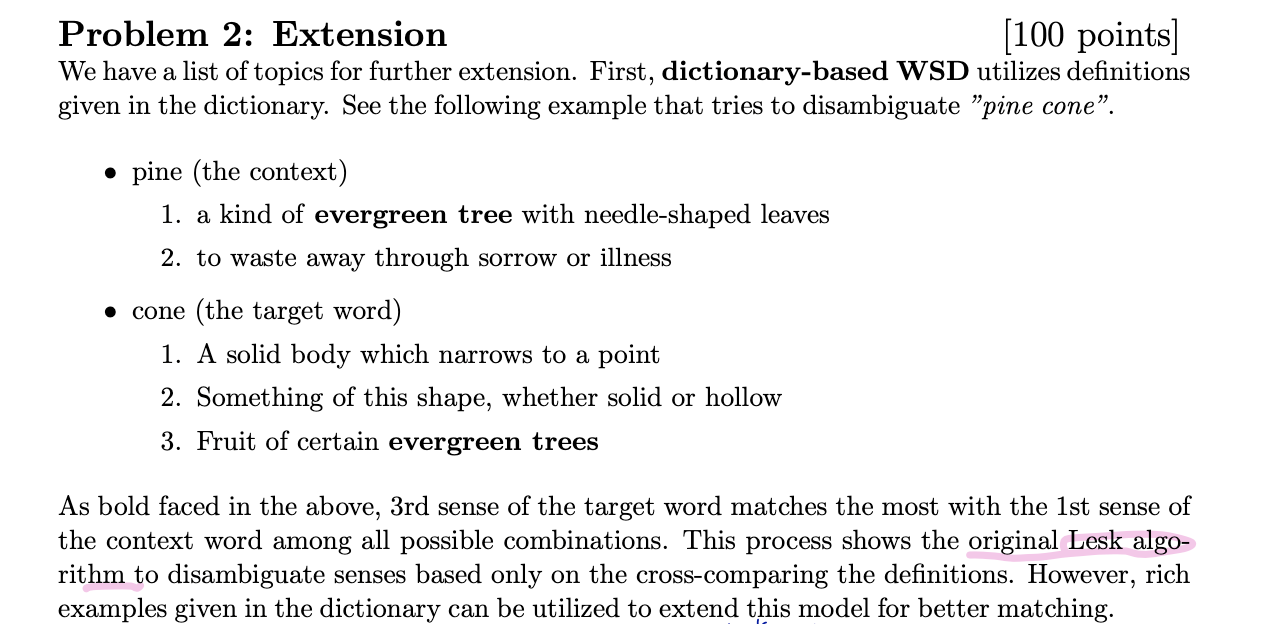

##(1)  
Design a **metric** that more rewards consecutive overlaps. For example, the 1st sense of pine and the 3rd sense of cone share two consecutive words in their definitions, which must earn higher score than the case when the two shared words are not consecutive in each definition. Note that there would be morphological variations in the definitions and examples. To increase the matching, stemming or lemmatizing could be useful.4

**Ans:**
From the question, we need to regard matching consecutive words a better match. We decide to build bigram and trigram model for the "gloss" of each sense in the dictionary XML file. And test it out whether considering consecutive words will lead to better result, and whether considering longer consecutive will have a even better result.

## (2) 
Implement a dictionary-based WSD system that disambiguates the sense by comparing the definitions of the target word to the definitions of relevant words in the context. Your design decision of choosing relevant words will determine the performance of the dictionary-based system in combining with the metric you designed above.

### Defining function to build consecutive words:

In [11]:
def find_bigrams(input_list):
    return zip(input_list, input_list[1:])
    #(input_list, input_list[1:])

In [12]:
def find_trigrams(input_list):
    return zip(input_list, input_list[1:], input_list[2:]) #(input_list, input_list[1:], input_list[2:])

In [13]:
def find_bigrams_test(input_list):
   return(input_list, input_list[1:])
find_bigrams_test(['how', 'is', 'your', 'cat?'])

(['how', 'is', 'your', 'cat?'], ['is', 'your', 'cat?'])

In [14]:
def clean_up_new(inp):
    clean_dt_new=[]
    for f in str(inp).split(" "):
        w=re.sub(r'[^a-zA-Z\.\%%]','', f)
        w=w.lower()
        if w not in stopwords:
            if w != '':
                w = porter.stem(w)
                clean_dt_new.append(w)
    clean_dt_new = find_bigrams(clean_dt_new)
    return clean_dt_new

In [15]:
val =open("/Users/hoangnha218/Desktop/Mini-Project 2/validate.data","r")

In [16]:
nw_validate = val
validate_List = [line.split('\n') for line in nw_validate]

df_predict_bi = pd.DataFrame(columns=('Given','Predicted'))

cnt=0
for each_entry in validate_List:
    w,ws=get_trainWord(each_entry) 
    clean_entry=(clean_up_new(each_entry))
    p=0
    max_ov=0
    given=w+"."+str(ws)
    for i in range(0,len(dict_gloss[w])):
        
        
        ov= set(find_bigrams(clean_up(dict_gloss[w][i]))).intersection(clean_entry)
        #ov1=set(clean_up_new(dict_eg[w][i])).intersection(clean_entry)
        nov=len(ov)
        if nov > max_ov:
            max_ov=nov
            p=i
    predicted=w+"."+str(p)
    
    #store in python data frame
    df_predict_bi.loc[cnt]=given,predicted
    cnt+=1

print(df_predict_bi)

            Given     Predicted
0     capital.n.1   capital.n.0
1     capital.n.1   capital.n.0
2     capital.n.1   capital.n.0
3     capital.n.1   capital.n.0
4     capital.n.1   capital.n.0
..            ...           ...
928      keep.v.1      keep.v.0
929      keep.v.4      keep.v.0
930      keep.v.1      keep.v.0
931  maintain.v.1  maintain.v.0
932  maintain.v.1  maintain.v.0

[933 rows x 2 columns]


In [17]:
def clean_up_new_tri(inp):
    clean_dt_new=[]
    for f in str(inp).split(" "):
        w=re.sub(r'[^a-zA-Z\.\%%]','', f)
        w=w.lower()
        if w not in stopwords:
            if w != '':
                w = porter.stem(w)
                clean_dt_new.append(w)
    clean_dt_new = find_trigrams(clean_dt_new)
    return clean_dt_new

In [18]:
val =open("/Users/hoangnha218/Desktop/Mini-Project 2/validate.data","r")

In [19]:
nw_validate = val
validate_List = [line.split('\n') for line in nw_validate]

df_predict_tri = pd.DataFrame(columns=('Given','Predicted'))

cnt=0
for each_entry in validate_List:
    w,ws=get_trainWord(each_entry) 
    clean_entry=(clean_up_new_tri(each_entry))
    p=0
    max_ov=0
    given=w+"."+str(ws)
    for i in range(0,len(dict_gloss[w])):
        
        
        ov= set(find_trigrams(clean_up(dict_gloss[w][i]))).intersection(clean_entry)
        #ov1=set(clean_up_new(dict_eg[w][i])).intersection(clean_entry)
        nov=len(ov)
        if nov > max_ov:
            max_ov=nov
            p=i
    predicted=w+"."+str(p)
    
    #store in python data frame
    df_predict_tri.loc[cnt]=given,predicted
    cnt+=1

print(df_predict_tri)

            Given     Predicted
0     capital.n.1   capital.n.0
1     capital.n.1   capital.n.0
2     capital.n.1   capital.n.0
3     capital.n.1   capital.n.0
4     capital.n.1   capital.n.0
..            ...           ...
928      keep.v.1      keep.v.0
929      keep.v.4      keep.v.0
930      keep.v.1      keep.v.0
931  maintain.v.1  maintain.v.0
932  maintain.v.1  maintain.v.0

[933 rows x 2 columns]


In [20]:
accuracies = {}

def accuracy(df):
    res = (df['Given'] == df['Predicted']).values
    return ((res==True).sum()/float(len(res))) * 100  

# Finding accuracy on train data and validate data:
accuracies['model_bi'] = accuracy(df_predict_bi)
accuracies['model_tri'] = accuracy(df_predict_tri)


print("{" + "\n".join("{}: {}".format(k, v) for k, v in accuracies.items()) + "}")

{model_bi: 0.0
model_tri: 0.0}


# Testing bigram model on training data


In [25]:
trn = open("/Users/hoangnha218/Desktop/Mini-Project 2/train.data","r")

In [26]:
nw_train = trn
train_List = [line.split('\n') for line in nw_train]

df_predict_bi = pd.DataFrame(columns=('Given','Predicted'))

cnt=0
for each_entry in train_List:
    w,ws=get_trainWord(each_entry) 
    clean_entry=(clean_up_new(each_entry))
    p=0
    max_ov=0
    given=w+"."+str(ws)
    for i in range(0,len(dict_gloss[w])):
        
        
        ov= set(find_bigrams(clean_up(dict_gloss[w][i]))).intersection(clean_entry)
        #ov1=set(clean_up_new(dict_eg[w][i])).intersection(clean_entry)
        nov=len(ov)
        if nov > max_ov:
            max_ov=nov
            p=i
    predicted=w+"."+str(p)
    
    #store in python data frame
    df_predict_bi.loc[cnt]=given,predicted
    cnt+=1

print(df_predict_bi)

            Given   Predicted
0      affect.v.1  affect.v.0
1      affect.v.1  affect.v.0
2      affect.v.1  affect.v.0
3      affect.v.1  affect.v.0
4      affect.v.1  affect.v.0
...           ...         ...
22276    work.v.1    work.v.0
22277    work.v.1    work.v.0
22278    work.v.1    work.v.0
22279    work.v.1    work.v.0
22280    work.v.9    work.v.0

[22281 rows x 2 columns]


# Testing Triagram model on training data

In [31]:
trn = open("/Users/hoangnha218/Desktop/Mini-Project 2/train.data","r")

In [ ]:
nw_train = trn
train_List = [line.split('\n') for line in nw_train]

df_predict_tri = pd.DataFrame(columns=('Given','Predicted'))

cnt=0
for each_entry in train_List:
    w,ws=get_trainWord(each_entry) 
    clean_entry=(clean_up_new_tri(each_entry))
    p=0
    max_ov=0
    given=w+"."+str(ws)
    for i in range(0,len(dict_gloss[w])):
        
        
        ov= set(find_trigrams(clean_up(dict_gloss[w][i]))).intersection(clean_entry)
        #ov1=set(clean_up_new(dict_eg[w][i])).intersection(clean_entry)
        nov=len(ov)
        if nov > max_ov:
            max_ov=nov
            p=i
    predicted=w+"."+str(p)
    
    #store in python data frame
    df_predict_tri.loc[cnt]=given,predicted
    cnt+=1

print(df_predict_tri)

3)
Because we mainly use glosses and examples in the dictionary to figure out the correct senses, no training is necessary for the Simple Lesk WSD. If you want to try the Corpus Lesk WSD (extension), try to augment the dictionary by the trainig data. If you think that those are not enough to achieve competitive accuracy, feel free to use the WordNet dictionary to further improve the performance.

4)
If no training process is involved, you could verify the performance of your Simple Lesk WSD system on the entire training set. If you want to compare the performance of various WSD systems like your Corpus Lesk or supervised WSD in the next section, test on the same validation set that we provide. You should also submit prediction results on the test data for every model that you would try